# MI
**_Ahmed - Luisa - Myria_**

## Exercise H6.1 (Convolutional Neural Network)


### 0. Setup and loading MNIST data


In [1]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow import nn
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Helpful resources
# Docs: https://keras.io/api/models/model_training_apis/
# https://teaching.pages.centralesupelec.fr/deeplearning-lectures-build/00-keras-mnist.html

2022-12-08 15:59:04.113001: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# 1. Importing the MNIST dataset and reshaping it so every image is a 784 vector
(X_train, y_train), (X_holdout, y_holdout) = mnist.load_data()

train_dataset_size = X_train.shape[0]
holdout_dataset_size = X_holdout.shape[0]

image_height = X_train.shape[1]
image_width = X_train.shape[2]

X_train = X_train.reshape(train_dataset_size, (image_height*image_width))
X_holdout = X_holdout.reshape(holdout_dataset_size, (image_height*image_width))

# 2. Change ys to be array of 1s and 0s
y_train = to_categorical(y_train, num_classes=10)
y_holdout = to_categorical(y_holdout, num_classes=10)

X_train.shape, X_holdout.shape, y_train.shape, y_holdout.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

## 1. Linear model

**A) Defining the model**

In [3]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

# 1. Define the model
num_of_nodes = 10
xi      = Input(shape=(image_height*image_width,))   # Input size (784 pixels)
xo      = Dense(num_of_nodes)(xi)                    # Defines a linear model [by default one more dimension is added for bias]
yo      = Activation('softmax')(xo)                  # Defining activation function to be softmax
linear_model   = Model(inputs=[xi], outputs=[yo])

linear_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


2022-12-08 15:59:09.079957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


**B) Running the model**

In [4]:
# 2. Define cost/loss function and compile the model
linear_model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.SGD(learning_rate=0.5),  
              metrics=['accuracy'])

# 3. Fitting the model
#     - data: 60,000
#     - batchsize (per one iteration): 100
#     - data contains 600 batches (i.e 600 iterations to cover each datapoint)
#     - 10,000 iterations => 17 epochs
print("ACHTUNG: In what follows:")
print("accuracy: percentage of correctly classified (training) data")
print("val_accuracy: percentage of correctly classified (validation) data\n\n")
linear_history = linear_model.fit(X_train, y_train,
          batch_size=100,
          epochs=17,
          verbose=1,
          validation_data=(X_holdout, y_holdout),
          # validation_split=0.1,
         )

score = linear_model.evaluate(X_holdout, y_holdout, verbose=0)
print('Final validation loss:', score[0])
print('Final validation accuracy:', score[1])

ACHTUNG: In what follows:
accuracy: percentage of correctly classified (training) data
val_accuracy: percentage of correctly classified (validation) data


Epoch 1/17
600/600 [==============================] - 1s 1ms/step - loss: 11743.1572 - accuracy: 0.8322 - val_loss: 6058.2222 - val_accuracy: 0.8822
Epoch 2/17
600/600 [==============================] - 1s 1ms/step - loss: 7283.1216 - accuracy: 0.8655 - val_loss: 5000.7334 - val_accuracy: 0.8924
Epoch 3/17
600/600 [==============================] - 1s 1ms/step - loss: 7035.6528 - accuracy: 0.8691 - val_loss: 7063.2407 - val_accuracy: 0.8680
Epoch 4/17
600/600 [==============================] - 1s 1ms/step - loss: 6543.1440 - accuracy: 0.8760 - val_loss: 13141.7158 - val_accuracy: 0.7619
Epoch 5/17
600/600 [==============================] - 1s 1ms/step - loss: 6579.9141 - accuracy: 0.8755 - val_loss: 6324.5308 - val_accuracy: 0.8740
Epoch 6/17
600/600 [==============================] - 1s 1ms/step - loss: 6406.1816 - accuracy: 0.8761

------------
## 2. Fully connected MLP with 3 hidden layers with 1500 hidden neurons in each hidden layer.

**A) Defining the model**

In [6]:
from tensorflow.keras import initializers

# 1. Defining the weight and bias layers
num_hidden_neurons = 1500
num_classes = 10

truncated_normal_dist = initializers.TruncatedNormal(mean=0., stddev=0.01)

weights_layer_0 = Dense(
    num_hidden_neurons,
    kernel_initializer = truncated_normal_dist,
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

weights_layer_1 = Dense(
    num_hidden_neurons,
    kernel_initializer = truncated_normal_dist,
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

weights_layer_2 = Dense(
    num_hidden_neurons,
    kernel_initializer = truncated_normal_dist,
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

weights_layer_output = Dense(
    num_classes,
    kernel_initializer = truncated_normal_dist,
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.softmax
)

# 2. Defining how layers are stacked together to form our network
xi = Input(shape=(image_height*image_width,))
x0 = weights_layer_0(xi)
x1 = weights_layer_1(x0)
x2 = weights_layer_2(x1)
y = weights_layer_output(x2)
mlp_model = Model(inputs=[xi], outputs=[y])

mlp_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 1500)              1177500   
                                                                 
 dense_2 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_3 (Dense)             (None, 1500)              2251500   
                                                                 
 dense_4 (Dense)             (None, 10)                15010     
                                                                 
Total params: 5,695,510
Trainable params: 5,695,510
Non-trainable params: 0
_________________________________________________________________


**B) Running the model**

In [7]:
# 3. Defining loss function and optimizer hyper params
mlp_model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-08
              ),
              metrics=['accuracy'])

# 4. Fitting the model
#     - data: 60,000
#     - batchsize (per one iteration): 100
#     - data contains 600 batches (i.e 600 iterations to cover each datapoint)
#     - 20,000 iterations => 33 epochs
print("ACHTUNG: In what follows:")
print("accuracy: percentage of correctly classified (training) data")
print("val_accuracy: percentage of correctly classified (validation) data")
mlp_history = mlp_model.fit(X_train, y_train,
          batch_size=100,
          epochs=33,
          verbose=1,
          validation_data=(X_holdout, y_holdout),
         )

score = mlp_model.evaluate(X_holdout, y_holdout, verbose=0)
print('Final validation loss:', score[0])
print('Final validation accuracy:', score[1])

ACHTUNG: In what follows:
accuracy: percentage of correctly classified (training) data
val_accuracy: percentage of correctly classified (validation) data
Epoch 1/33
600/600 [==============================] - 20s 32ms/step - loss: 0.2690 - accuracy: 0.9260 - val_loss: 0.1539 - val_accuracy: 0.9543
Epoch 2/33
600/600 [==============================] - 21s 36ms/step - loss: 0.1346 - accuracy: 0.9634 - val_loss: 0.1391 - val_accuracy: 0.9613
Epoch 3/33
600/600 [==============================] - 21s 35ms/step - loss: 0.1036 - accuracy: 0.9705 - val_loss: 0.1128 - val_accuracy: 0.9705
Epoch 4/33
600/600 [==============================] - 20s 33ms/step - loss: 0.0875 - accuracy: 0.9759 - val_loss: 0.1074 - val_accuracy: 0.9746
Epoch 5/33
600/600 [==============================] - 19s 32ms/step - loss: 0.0765 - accuracy: 0.9786 - val_loss: 0.1271 - val_accuracy: 0.9684
Epoch 6/33
600/600 [==============================] - 20s 33ms/step - loss: 0.0687 - accuracy: 0.9818 - val_loss: 0.1094 - val

------------------
### 3. Dropout Regularization

In [8]:
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dropout

# 0. Make sure of currect shape (flat)
X_train = X_train.reshape(train_dataset_size, (image_height*image_width))
X_holdout = X_holdout.reshape(holdout_dataset_size, (image_height*image_width))

# 1. Defining the weight and bias layers
num_hidden_neurons = 1500
num_classes = 10

dropout_weights_layer_0 = Dense(
    num_hidden_neurons,
    kernel_initializer = truncated_normal_dist,
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

dropout_weights_layer_1 = Dense(
    num_hidden_neurons,
    kernel_initializer = truncated_normal_dist,
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

dropout_weights_layer_2 = Dense(
    num_hidden_neurons,
    kernel_initializer = truncated_normal_dist,
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.relu
)

dropout_weights_layer_output = Dense(
    num_classes,
    kernel_initializer = truncated_normal_dist,
    bias_initializer = initializers.Constant(value=-0.1),
    activation = nn.softmax
)

# 2. Defining how layers are stacked together to form our network
xi = Input(shape=(image_height*image_width,))
x0 = Dropout(0.5)(dropout_weights_layer_0(xi))
x1 = Dropout(0.5)(dropout_weights_layer_1(x0))
x2 = Dropout(0.5)(dropout_weights_layer_2(x1))
y = dropout_weights_layer_output(x2)
drop_out_model = Model(inputs=[xi], outputs=[y])

# 3. Defining loss function and optimizer hyper params
drop_out_model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-08
              ),
              metrics=['accuracy'])

# 4. Fitting the model
#     - data: 60,000
#     - batchsize (per one iteration): 100
#     - data contains 600 batches (i.e 600 iterations to cover each datapoint)
#     - 20,000 iterations => 33 epochs
print("ACHTUNG: In what follows:")
print("accuracy: percentage of correctly classified (training) data")
print("val_accuracy: percentage of correctly classified (validation) data\n")
mlp_dropout_history = drop_out_model.fit(X_train, y_train,
          batch_size=100,
          epochs=33,
          verbose=1,
          validation_data=(X_holdout, y_holdout),
         )

score = drop_out_model.evaluate(X_holdout, y_holdout, verbose=0)
print('Final validation loss:', score[0])
print('Final validation accuracy:', score[1])

ACHTUNG: In what follows:
accuracy: percentage of correctly classified (training) data
val_accuracy: percentage of correctly classified (validation) data

Epoch 1/33
600/600 [==============================] - 28s 45ms/step - loss: 0.4921 - accuracy: 0.8663 - val_loss: 0.1925 - val_accuracy: 0.9479
Epoch 2/33
600/600 [==============================] - 27s 45ms/step - loss: 0.4495 - accuracy: 0.8944 - val_loss: 0.1993 - val_accuracy: 0.9519
Epoch 3/33
600/600 [==============================] - 29s 49ms/step - loss: 0.4355 - accuracy: 0.8989 - val_loss: 0.2557 - val_accuracy: 0.9498
Epoch 4/33
600/600 [==============================] - 27s 45ms/step - loss: 0.4434 - accuracy: 0.9010 - val_loss: 0.2205 - val_accuracy: 0.9551
Epoch 5/33
600/600 [==============================] - 26s 44ms/step - loss: 0.4396 - accuracy: 0.9037 - val_loss: 0.2111 - val_accuracy: 0.9584
Epoch 6/33
600/600 [==============================] - 27s 45ms/step - loss: 0.4434 - accuracy: 0.9031 - val_loss: 0.1955 - va

------------------
## 4. CNN (ahaaa)

**A) Defining the model**

In [9]:
# 1. Reshaping the input to be HxW matrix again
X_train = X_train.reshape(train_dataset_size, image_height, image_width)
X_holdout = X_holdout.reshape(holdout_dataset_size, image_height, image_width)

In [10]:
# 2. Defining the CNN layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D

xi = Input(shape=(image_height, image_width, 1))
x0 = Conv2D(filters=32, kernel_size=5, strides=1, padding='same')(xi)
h0 = Activation('relu')(x0)
x1 = MaxPooling2D(pool_size=2, strides=2)(h0)
x2 = Conv2D(filters=64, kernel_size=5, strides=1, padding='same')(x1)
h2 = Activation('relu')(x2)
x3 = MaxPooling2D(pool_size=2, strides=2)(h2)
x = Flatten()(x3)
y = Dense(num_classes, activation='softmax')(x)

cnn_model = Model(inputs=[xi], outputs=[y])
cnn_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 activation_2 (Activation)   (None, 14, 14, 64)        0         
                                                           

**B) Running the model**

In [11]:
# 3. Defining the optimizer and loss function
cnn_model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-08
              ),
              metrics=['accuracy'])

# 4. Fitting the model
#     - data: 60,000
#     - batchsize (per one iteration): 100
#     - data contains 600 batches (i.e 600 iterations to cover each datapoint)
#     - 20,000 iterations => 33 epochs
print("ACHTUNG: In what follows:")
print("accuracy: percentage of correctly classified (training) data")
print("val_accuracy: percentage of correctly classified (validation) data")
cnn_history = cnn_model.fit(X_train, y_train,
          batch_size=100,
          epochs=33,
          verbose=1,
          validation_data=(X_holdout, y_holdout),
         )

score = cnn_model.evaluate(X_holdout, y_holdout, verbose=0)
print('Final validation loss:', score[0])
print('Final validation accuracy:', score[1])

ACHTUNG: In what follows:
accuracy: percentage of correctly classified (training) data
val_accuracy: percentage of correctly classified (validation) data
Epoch 1/33
600/600 [==============================] - 37s 60ms/step - loss: 0.4609 - accuracy: 0.9381 - val_loss: 0.0543 - val_accuracy: 0.9814
Epoch 2/33
600/600 [==============================] - 35s 58ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0538 - val_accuracy: 0.9830
Epoch 3/33
600/600 [==============================] - 35s 59ms/step - loss: 0.0365 - accuracy: 0.9885 - val_loss: 0.0549 - val_accuracy: 0.9841
Epoch 4/33
600/600 [==============================] - 35s 58ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.0500 - val_accuracy: 0.9865
Epoch 5/33
600/600 [==============================] - 35s 58ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0568 - val_accuracy: 0.9844
Epoch 6/33
600/600 [==============================] - 35s 58ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0488 - val

------------------
### 5. Comparison between the different approaches

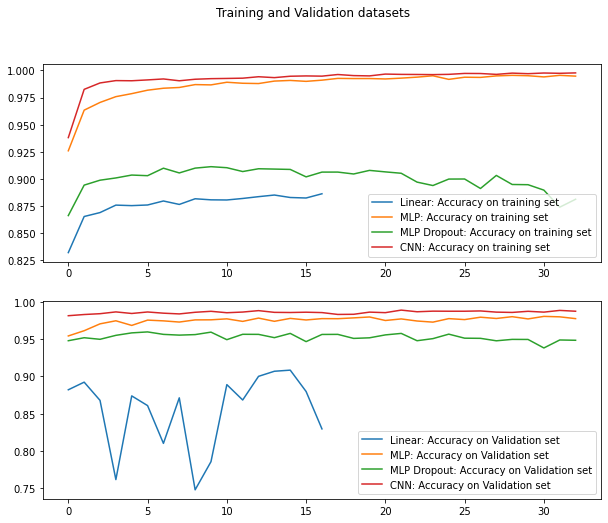

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, figsize=(10, 8))
fig.suptitle('Training and Validation datasets')

# Plot training
axs[0].plot(linear_history.history['accuracy'], label="Linear: Accuracy on training set")
axs[0].plot(mlp_history.history['accuracy'], label="MLP: Accuracy on training set")
axs[0].plot(mlp_dropout_history.history['accuracy'], label="MLP Dropout: Accuracy on training set")
axs[0].plot(cnn_history.history['accuracy'], label="CNN: Accuracy on training set")

# Plot validation
axs[1].plot(linear_history.history['val_accuracy'], label="Linear: Accuracy on Validation set")
axs[1].plot(mlp_history.history['val_accuracy'], label="MLP: Accuracy on Validation set")
axs[1].plot(mlp_dropout_history.history['val_accuracy'], label="MLP Dropout: Accuracy on Validation set")
axs[1].plot(cnn_history.history['val_accuracy'], label="CNN: Accuracy on Validation set")


# Cosmetic stuff
axs[0].legend()
axs[1].legend()
plt.show()


------------------
### 6. Using the model to predict some images (just for fun)

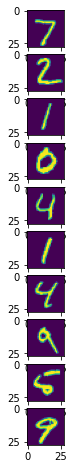

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [18]:
import numpy as np

# a. Loading some images
images_flat = X_holdout.reshape(holdout_dataset_size, (image_height*image_width))[0:10] # in case we want to test using models that take flat struct
images = X_holdout.reshape(holdout_dataset_size, image_height,image_width)[0:10]

# b. plotting the imags
fig, axs = plt.subplots(10, figsize=(10, 8))
for i, image in enumerate(images):
    axs[i].imshow(image)
plt.show()

# c. Using the model to do prediction on this set of images
results = cnn_model(images, training=False)

# d. Transforming results to something we can read (not probabilties)
human_readable_results = [np.argmax(res) for res in results.numpy()]
human_readable_results